In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks, peak_widths
from scipy.signal import argrelextrema, argrelmax, argrelmin
import dask.dataframe


col='vhee'
energy='150 MV'
hist="6m"
CSD=5.0
x=np.arange(-.995,.995+0.01,0.01)



data03=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_holeopt/results/dosetomedium_vhee_holeopt_0.3.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
data05=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_holeopt/results/dosetomedium_vhee_holeopt_0.5.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
data07=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_holeopt/results/dosetomedium_vhee_holeopt_0.7.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
data09=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_holeopt/results/dosetomedium_vhee_holeopt_0.9.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
data11=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_holeopt/results/dosetomedium_vhee_holeopt_1.1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])

data03.dose=(data03.dose*(1))/(1.60218*10**-10) #4.5 amps
data05.dose=(data05.dose*(1))/(1.60218*10**-10) #4.5 amps
data07.dose=(data07.dose*(1))/(1.60218*10**-10) #4.5 amps
data09.dose=(data09.dose*(1))/(1.60218*10**-10) #4.5 amps
data11.dose=(data11.dose*(1))/(1.60218*10**-10) #4.5 amps



In [2]:
dose03_1=np.zeros((200,200));dose03_2=np.zeros((200,200));dose03_3=np.zeros((200,200));dose03_4=np.zeros((200,200))
dose03_5=np.zeros((200,200));dose03_6=np.zeros((200,200));dose03_7=np.zeros((200,200));dose03_8=np.zeros((200,200))
dose03_9=np.zeros((200,200));dose03_10=np.zeros((200,200));dose03_11=np.zeros((200,200));dose03_12=np.zeros((200,200))
dose03_13=np.zeros((200,200));dose03_14=np.zeros((200,200));dose03_15=np.zeros((200,200));dose03_16=np.zeros((200,200))
dose03_17=np.zeros((200,200));dose03_18=np.zeros((200,200));dose03_19=np.zeros((200,200));dose03_20=np.zeros((200,200))

dose05_1=np.zeros((200,200));dose05_2=np.zeros((200,200));dose05_3=np.zeros((200,200));dose05_4=np.zeros((200,200))
dose05_5=np.zeros((200,200));dose05_6=np.zeros((200,200));dose05_7=np.zeros((200,200));dose05_8=np.zeros((200,200))
dose05_9=np.zeros((200,200));dose05_10=np.zeros((200,200));dose05_11=np.zeros((200,200));dose05_12=np.zeros((200,200))
dose05_13=np.zeros((200,200));dose05_14=np.zeros((200,200));dose05_15=np.zeros((200,200));dose05_16=np.zeros((200,200))
dose05_17=np.zeros((200,200));dose05_18=np.zeros((200,200));dose05_19=np.zeros((200,200));dose05_20=np.zeros((200,200))

dose07_1=np.zeros((200,200));dose07_2=np.zeros((200,200));dose07_3=np.zeros((200,200));dose07_4=np.zeros((200,200))
dose07_5=np.zeros((200,200));dose07_6=np.zeros((200,200));dose07_7=np.zeros((200,200));dose07_8=np.zeros((200,200))
dose07_9=np.zeros((200,200));dose07_10=np.zeros((200,200));dose07_11=np.zeros((200,200));dose07_12=np.zeros((200,200))
dose07_13=np.zeros((200,200));dose07_14=np.zeros((200,200));dose07_15=np.zeros((200,200));dose07_16=np.zeros((200,200))
dose07_17=np.zeros((200,200));dose07_18=np.zeros((200,200));dose07_19=np.zeros((200,200));dose07_20=np.zeros((200,200))

dose09_1=np.zeros((200,200));dose09_2=np.zeros((200,200));dose09_3=np.zeros((200,200));dose09_4=np.zeros((200,200))
dose09_5=np.zeros((200,200));dose09_6=np.zeros((200,200));dose09_7=np.zeros((200,200));dose09_8=np.zeros((200,200))
dose09_9=np.zeros((200,200));dose09_10=np.zeros((200,200));dose09_11=np.zeros((200,200));dose09_12=np.zeros((200,200))
dose09_13=np.zeros((200,200));dose09_14=np.zeros((200,200));dose09_15=np.zeros((200,200));dose09_16=np.zeros((200,200))
dose09_17=np.zeros((200,200));dose09_18=np.zeros((200,200));dose09_19=np.zeros((200,200));dose09_20=np.zeros((200,200))


dose11_1=np.zeros((200,200));dose11_2=np.zeros((200,200));dose11_3=np.zeros((200,200));dose11_4=np.zeros((200,200))
dose11_5=np.zeros((200,200));dose11_6=np.zeros((200,200));dose11_7=np.zeros((200,200));dose11_8=np.zeros((200,200))
dose11_9=np.zeros((200,200));dose11_10=np.zeros((200,200));dose11_11=np.zeros((200,200));dose11_12=np.zeros((200,200))
dose11_13=np.zeros((200,200));dose11_14=np.zeros((200,200));dose11_15=np.zeros((200,200));dose11_16=np.zeros((200,200))
dose11_17=np.zeros((200,200));dose11_18=np.zeros((200,200));dose11_19=np.zeros((200,200));dose11_20=np.zeros((200,200))

for i in np.arange(0,len(data03.dose),20):
    dose03_1[data03.x[i]][data03.y[i]]=data03.dose[i]
    dose03_2[data03.x[i+1]][data03.y[i+1]]=data03.dose[i+1]
    dose03_3[data03.x[i+2]][data03.y[i+2]]=data03.dose[i+2]
    dose03_4[data03.x[i+3]][data03.y[i+3]]=data03.dose[i+3]
    dose03_5[data03.x[i+4]][data03.y[i+4]]=data03.dose[i+4]
    dose03_6[data03.x[i+5]][data03.y[i+5]]=data03.dose[i+5]
    dose03_7[data03.x[i+6]][data03.y[i+6]]=data03.dose[i+6]
    dose03_8[data03.x[i+7]][data03.y[i+7]]=data03.dose[i+7]
    dose03_9[data03.x[i+8]][data03.y[i+8]]=data03.dose[i+8]
    dose03_10[data03.x[i+9]][data03.y[i+9]]=data03.dose[i+9]
    dose03_11[data03.x[i+10]][data03.y[i+10]]=data03.dose[i+10]
    dose03_12[data03.x[i+11]][data03.y[i+11]]=data03.dose[i+11]
    dose03_13[data03.x[i+12]][data03.y[i+12]]=data03.dose[i+12]
    dose03_14[data03.x[i+13]][data03.y[i+13]]=data03.dose[i+13]
    dose03_15[data03.x[i+14]][data03.y[i+14]]=data03.dose[i+14]
    dose03_16[data03.x[i+15]][data03.y[i+15]]=data03.dose[i+15]
    dose03_17[data03.x[i+16]][data03.y[i+16]]=data03.dose[i+16]
    dose03_18[data03.x[i+17]][data03.y[i+17]]=data03.dose[i+17]
    dose03_19[data03.x[i+18]][data03.y[i+18]]=data03.dose[i+18]
    dose03_20[data03.x[i+19]][data03.y[i+19]]=data03.dose[i+19]

for i in np.arange(0,len(data05.dose),20):
    dose05_1[data05.x[i]][data05.y[i]]=data05.dose[i]
    dose05_2[data05.x[i+1]][data05.y[i+1]]=data05.dose[i+1]
    dose05_3[data05.x[i+2]][data05.y[i+2]]=data05.dose[i+2]
    dose05_4[data05.x[i+3]][data05.y[i+3]]=data05.dose[i+3]
    dose05_5[data05.x[i+4]][data05.y[i+4]]=data05.dose[i+4]
    dose05_6[data05.x[i+5]][data05.y[i+5]]=data05.dose[i+5]
    dose05_7[data05.x[i+6]][data05.y[i+6]]=data05.dose[i+6]
    dose05_8[data05.x[i+7]][data05.y[i+7]]=data05.dose[i+7]
    dose05_9[data05.x[i+8]][data05.y[i+8]]=data05.dose[i+8]
    dose05_10[data05.x[i+9]][data05.y[i+9]]=data05.dose[i+9]
    dose05_11[data05.x[i+10]][data05.y[i+10]]=data05.dose[i+10]
    dose05_12[data05.x[i+11]][data05.y[i+11]]=data05.dose[i+11]
    dose05_13[data05.x[i+12]][data05.y[i+12]]=data05.dose[i+12]
    dose05_14[data05.x[i+13]][data05.y[i+13]]=data05.dose[i+13]
    dose05_15[data05.x[i+14]][data05.y[i+14]]=data05.dose[i+14]
    dose05_16[data05.x[i+15]][data05.y[i+15]]=data05.dose[i+15]
    dose05_17[data05.x[i+16]][data05.y[i+16]]=data05.dose[i+16]
    dose05_18[data05.x[i+17]][data05.y[i+17]]=data05.dose[i+17]
    dose05_19[data05.x[i+18]][data05.y[i+18]]=data05.dose[i+18]
    dose05_20[data05.x[i+19]][data05.y[i+19]]=data05.dose[i+19]

for i in np.arange(0,len(data07.dose),20):
    dose07_1[data07.x[i]][data07.y[i]]=data07.dose[i]
    dose07_2[data07.x[i+1]][data07.y[i+1]]=data07.dose[i+1]
    dose07_3[data07.x[i+2]][data07.y[i+2]]=data07.dose[i+2]
    dose07_4[data07.x[i+3]][data07.y[i+3]]=data07.dose[i+3]
    dose07_5[data07.x[i+4]][data07.y[i+4]]=data07.dose[i+4]
    dose07_6[data07.x[i+5]][data07.y[i+5]]=data07.dose[i+5]
    dose07_7[data07.x[i+6]][data07.y[i+6]]=data07.dose[i+6]
    dose07_8[data07.x[i+7]][data07.y[i+7]]=data07.dose[i+7]
    dose07_9[data07.x[i+8]][data07.y[i+8]]=data07.dose[i+8]
    dose07_10[data07.x[i+9]][data07.y[i+9]]=data07.dose[i+9]
    dose07_11[data07.x[i+10]][data07.y[i+10]]=data07.dose[i+10]
    dose07_12[data07.x[i+11]][data07.y[i+11]]=data07.dose[i+11]
    dose07_13[data07.x[i+12]][data07.y[i+12]]=data07.dose[i+12]
    dose07_14[data07.x[i+13]][data07.y[i+13]]=data07.dose[i+13]
    dose07_15[data07.x[i+14]][data07.y[i+14]]=data07.dose[i+14]
    dose07_16[data07.x[i+15]][data07.y[i+15]]=data07.dose[i+15]
    dose07_17[data07.x[i+16]][data07.y[i+16]]=data07.dose[i+16]
    dose07_18[data07.x[i+17]][data07.y[i+17]]=data07.dose[i+17]
    dose07_19[data07.x[i+18]][data07.y[i+18]]=data07.dose[i+18]
    dose07_20[data07.x[i+19]][data07.y[i+19]]=data07.dose[i+19]

for i in np.arange(0,len(data09.dose),20):
    dose09_1[data09.x[i]][data09.y[i]]=data09.dose[i]
    dose09_2[data09.x[i+1]][data09.y[i+1]]=data09.dose[i+1]
    dose09_3[data09.x[i+2]][data09.y[i+2]]=data09.dose[i+2]
    dose09_4[data09.x[i+3]][data09.y[i+3]]=data09.dose[i+3]
    dose09_5[data09.x[i+4]][data09.y[i+4]]=data09.dose[i+4]
    dose09_6[data09.x[i+5]][data09.y[i+5]]=data09.dose[i+5]
    dose09_7[data09.x[i+6]][data09.y[i+6]]=data09.dose[i+6]
    dose09_8[data09.x[i+7]][data09.y[i+7]]=data09.dose[i+7]
    dose09_9[data09.x[i+8]][data09.y[i+8]]=data09.dose[i+8]
    dose09_10[data09.x[i+9]][data09.y[i+9]]=data09.dose[i+9]
    dose09_11[data09.x[i+10]][data09.y[i+10]]=data09.dose[i+10]
    dose09_12[data09.x[i+11]][data09.y[i+11]]=data09.dose[i+11]
    dose09_13[data09.x[i+12]][data09.y[i+12]]=data09.dose[i+12]
    dose09_14[data09.x[i+13]][data09.y[i+13]]=data09.dose[i+13]
    dose09_15[data09.x[i+14]][data09.y[i+14]]=data09.dose[i+14]
    dose09_16[data09.x[i+15]][data09.y[i+15]]=data09.dose[i+15]
    dose09_17[data09.x[i+16]][data09.y[i+16]]=data09.dose[i+16]
    dose09_18[data09.x[i+17]][data09.y[i+17]]=data09.dose[i+17]
    dose09_19[data09.x[i+18]][data09.y[i+18]]=data09.dose[i+18]
    dose09_20[data09.x[i+19]][data09.y[i+19]]=data09.dose[i+19]

for i in np.arange(0,len(data11.dose),20):
    dose11_1[data11.x[i]][data11.y[i]]=data11.dose[i]
    dose11_2[data11.x[i+1]][data11.y[i+1]]=data11.dose[i+1]
    dose11_3[data11.x[i+2]][data11.y[i+2]]=data11.dose[i+2]
    dose11_4[data11.x[i+3]][data11.y[i+3]]=data11.dose[i+3]
    dose11_5[data11.x[i+4]][data11.y[i+4]]=data11.dose[i+4]
    dose11_6[data11.x[i+5]][data11.y[i+5]]=data11.dose[i+5]
    dose11_7[data11.x[i+6]][data11.y[i+6]]=data11.dose[i+6]
    dose11_8[data11.x[i+7]][data11.y[i+7]]=data11.dose[i+7]
    dose11_9[data11.x[i+8]][data11.y[i+8]]=data11.dose[i+8]
    dose11_10[data11.x[i+9]][data11.y[i+9]]=data11.dose[i+9]
    dose11_11[data11.x[i+10]][data11.y[i+10]]=data11.dose[i+10]
    dose11_12[data11.x[i+11]][data11.y[i+11]]=data11.dose[i+11]
    dose11_13[data11.x[i+12]][data11.y[i+12]]=data11.dose[i+12]
    dose11_14[data11.x[i+13]][data11.y[i+13]]=data11.dose[i+13]
    dose11_15[data11.x[i+14]][data11.y[i+14]]=data11.dose[i+14]
    dose11_16[data11.x[i+15]][data11.y[i+15]]=data11.dose[i+15]
    dose11_17[data11.x[i+16]][data11.y[i+16]]=data11.dose[i+16]
    dose11_18[data11.x[i+17]][data11.y[i+17]]=data11.dose[i+17]
    dose11_19[data11.x[i+18]][data11.y[i+18]]=data11.dose[i+18]
    dose11_20[data11.x[i+19]][data11.y[i+19]]=data11.dose[i+19]

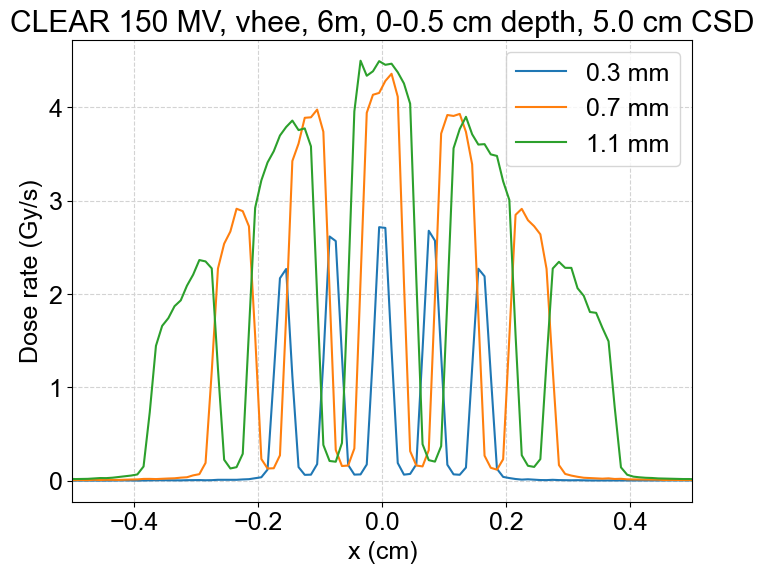

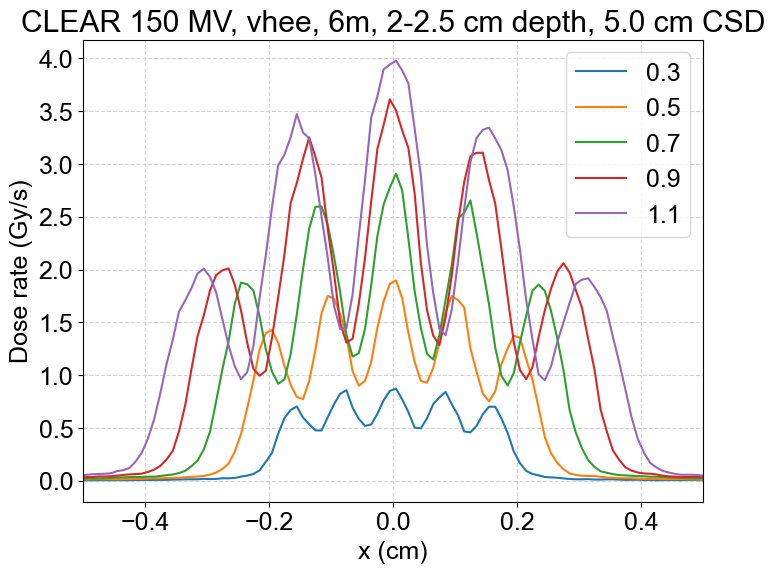

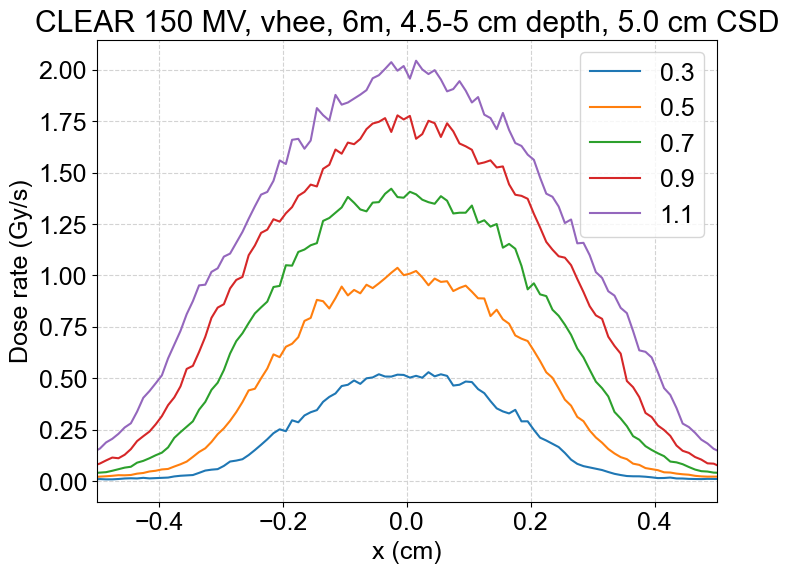

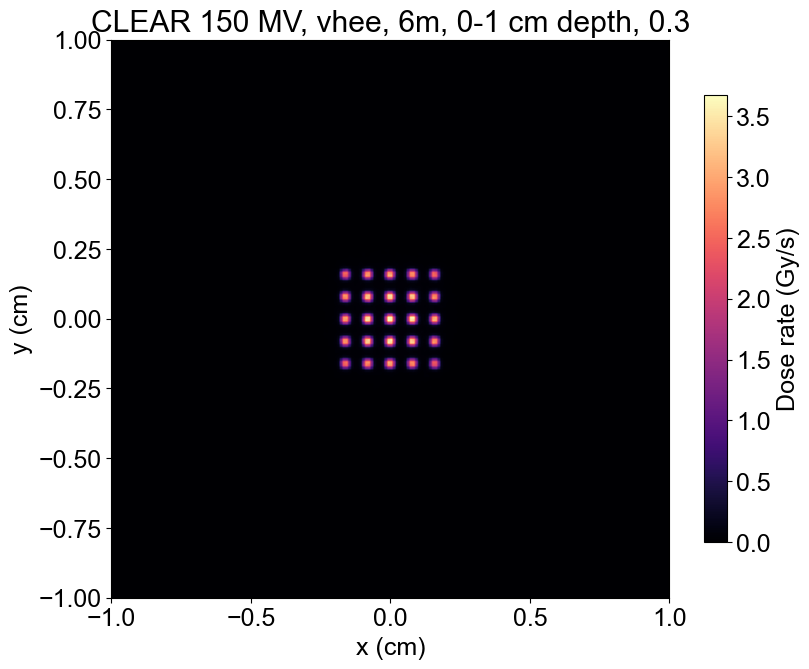

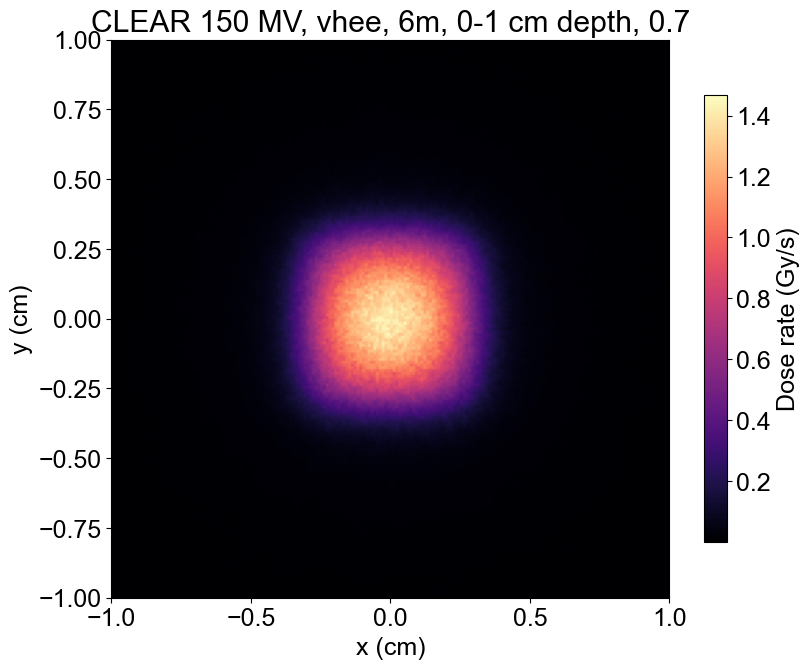

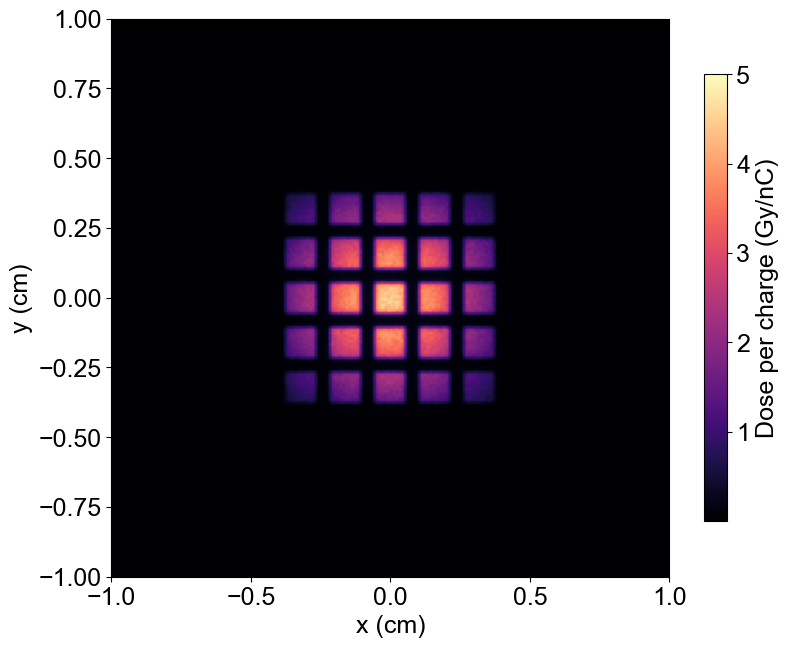

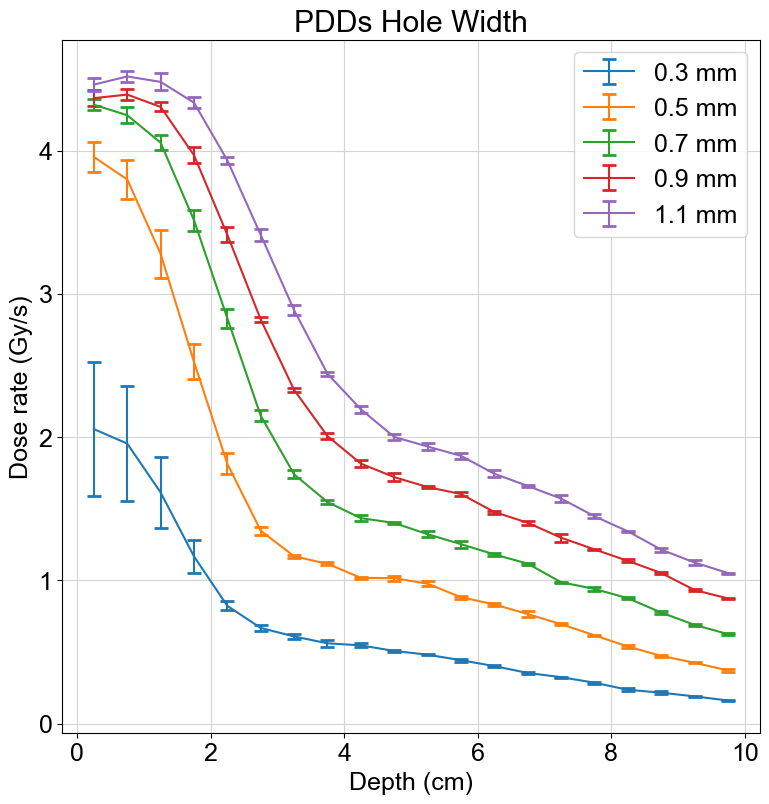

In [3]:
%matplotlib inline
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


doses03=[dose03_1,dose03_2,dose03_3,dose03_4,dose03_5,dose03_6,dose03_7,dose03_8,dose03_9,dose03_10,dose03_11,dose03_12,dose03_13,dose03_14,dose03_15,dose03_16,dose03_17,dose03_18,dose03_19,dose03_20]
doses05=[dose05_1,dose05_2,dose05_3,dose05_4,dose05_5,dose05_6,dose05_7,dose05_8,dose05_9,dose05_10,dose05_11,dose05_12,dose05_13,dose05_14,dose05_15,dose05_16,dose05_17,dose05_18,dose05_19,dose05_20]
doses07=[dose07_1,dose07_2,dose07_3,dose07_4,dose07_5,dose07_6,dose07_7,dose07_8,dose07_9,dose07_10,dose07_11,dose07_12,dose07_13,dose07_14,dose07_15,dose07_16,dose07_17,dose07_18,dose07_19,dose07_20]
doses09=[dose09_1,dose09_2,dose09_3,dose09_4,dose09_5,dose09_6,dose09_7,dose09_8,dose09_9,dose09_10,dose09_11,dose09_12,dose09_13,dose09_14,dose09_15,dose09_16,dose09_17,dose09_18,dose09_19,dose09_20]
doses11=[dose11_1,dose11_2,dose11_3,dose11_4,dose11_5,dose11_6,dose11_7,dose11_8,dose11_9,dose11_10,dose11_11,dose11_12,dose11_13,dose11_14,dose11_15,dose11_16,dose11_17,dose11_18,dose11_19,dose11_20]

profile03_1=(dose03_1.T[100]+dose03_1.T[101])/2
profile05_1=(dose05_1.T[100]+dose05_1.T[101])/2
profile07_1=(dose07_1.T[100]+dose07_1.T[101])/2
profile09_1=(dose09_1.T[100]+dose09_1.T[101])/2
profile11_1=(dose11_1.T[100]+dose11_1.T[101])/2

profile03_2=(dose03_5.T[100]+dose03_5.T[101])/2
profile05_2=(dose05_5.T[100]+dose05_5.T[101])/2
profile07_2=(dose07_5.T[100]+dose07_5.T[101])/2
profile09_2=(dose09_5.T[100]+dose09_5.T[101])/2
profile11_2=(dose11_5.T[100]+dose11_5.T[101])/2

profile03_3=(dose03_10.T[100]+dose03_10.T[101])/2
profile05_3=(dose05_10.T[100]+dose05_10.T[101])/2
profile07_3=(dose07_10.T[100]+dose07_10.T[101])/2
profile09_3=(dose09_10.T[100]+dose09_10.T[101])/2
profile11_3=(dose11_10.T[100]+dose11_10.T[101])/2



figure(1,figsize=(8,6))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,profile03_1,label='0.3 mm')
#plt.plot(x,profile05_1,label='0.5 mm')
plt.plot(x,profile07_1,label='0.7 mm')
#plt.plot(x,profile09_1,label='0.9 mm')
plt.plot(x,profile11_1,label='1.1 mm')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('Dose rate (Gy/s)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-0.5,0.5)



figure(2,figsize=(8,6))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,profile03_2,label='0.3')
plt.plot(x,profile05_2,label='0.5')
plt.plot(x,profile07_2,label='0.7')
plt.plot(x,profile09_2,label='0.9')
plt.plot(x,profile11_2,label='1.1')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('Dose rate (Gy/s)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-0.5,0.5)

figure(3,figsize=(8,6))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 4.5-5 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,profile03_3,label='0.3')
plt.plot(x,profile05_3,label='0.5')
plt.plot(x,profile07_3,label='0.7')
plt.plot(x,profile09_3,label='0.9')
plt.plot(x,profile11_3,label='1.1')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('Dose rate (Gy/s)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-0.5,0.5)

figure(4,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, 0.3')
plt.imshow(dose03_1,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(5,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, 0.7')
plt.imshow(dose07_10,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(6,figsize=(9,8))
#plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, 1.1')
plt.imshow(dose11_1,cmap='magma',extent=(-1,1,-1,1),vmax=5)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose per charge (Gy/nC)')

depths=np.arange(0.25,10,0.5)
PDD03=[];PDD05=[];PDD07=[];PDD09=[];PDD11=[]
PDD03_err=[];PDD05_err=[];PDD07_err=[];PDD09_err=[];PDD11_err=[]
for d in np.arange(0,len(doses03)):
    arr03=[]
    arr03=[doses03[d][100][100],doses03[d][101][100],doses03[d][100][101],doses03[d][101][101]]
    PDD03.append(np.mean(arr03))
    PDD03_err.append(np.std(arr03)/2)
    
    arr05=[]
    arr05=[doses05[d][100][100],doses05[d][101][100],doses05[d][100][101],doses05[d][101][101]]
    PDD05.append(np.mean(arr05))
    PDD05_err.append(np.std(arr05)/2)
    
    arr07=[]
    arr07=[doses07[d][100][100],doses07[d][101][100],doses07[d][100][101],doses07[d][101][101]]
    PDD07.append(np.mean(arr07))
    PDD07_err.append(np.std(arr07)/2)

    arr09=[]
    arr09=[doses09[d][100][100],doses09[d][101][100],doses09[d][100][101],doses09[d][101][101]]
    PDD09.append(np.mean(arr09))
    PDD09_err.append(np.std(arr09)/2)

    arr11=[]
    arr11=[doses11[d][100][100],doses11[d][101][100],doses11[d][100][101],doses11[d][101][101]]
    PDD11.append(np.mean(arr11))
    PDD11_err.append(np.std(arr11)/2)
    
figure(7,figsize=(9,9))
plt.title('PDDs Hole Width')
plt.errorbar(depths,PDD03,yerr=PDD03_err,capsize=5,capthick=2,label='0.3 mm')
plt.errorbar(depths,PDD05,yerr=PDD05_err,capsize=5,capthick=2,label='0.5 mm')
plt.errorbar(depths,PDD07,yerr=PDD07_err,capsize=5,capthick=2,label='0.7 mm')
plt.errorbar(depths,PDD09,yerr=PDD09_err,capsize=5,capthick=2,label='0.9 mm')
plt.errorbar(depths,PDD11,yerr=PDD11_err,capsize=5,capthick=2,label='1.1 mm')
plt.ylabel('Dose rate (Gy/s)')
plt.xlabel('Depth (cm)')
plt.legend()
plt.grid(c='lightgray')


In [4]:
def align_y_axis(ax1, ax2, minresax1, minresax2,numticks):
    """ Sets tick marks of twinx axes to line up with x total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * (numticks-1)
    ax2factor = minresax2 * (numticks-1)
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               numticks))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               numticks))

[18.94895155 12.90992837  8.10323398  4.15241051  2.33494234  1.56022047
  1.19734439  1.02479034  0.94659534  0.92028069  0.91334508  0.91078204
  0.91069912  0.91338715  0.91698363  0.92032633  0.92413364  0.93592942
  0.93843645  0.94318407] [1.25145579 0.83781821 0.54941828 0.30378405 0.17411152 0.11389575
 0.08531943 0.0707579  0.0640512  0.0605449  0.05968649 0.05791077
 0.05578382 0.05404394 0.05169887 0.05009617 0.04753072 0.04493597
 0.04222504 0.03924154]
274.7 308.1 325.9 342.1 351.3
21.46770267938343 1.0875252182648976


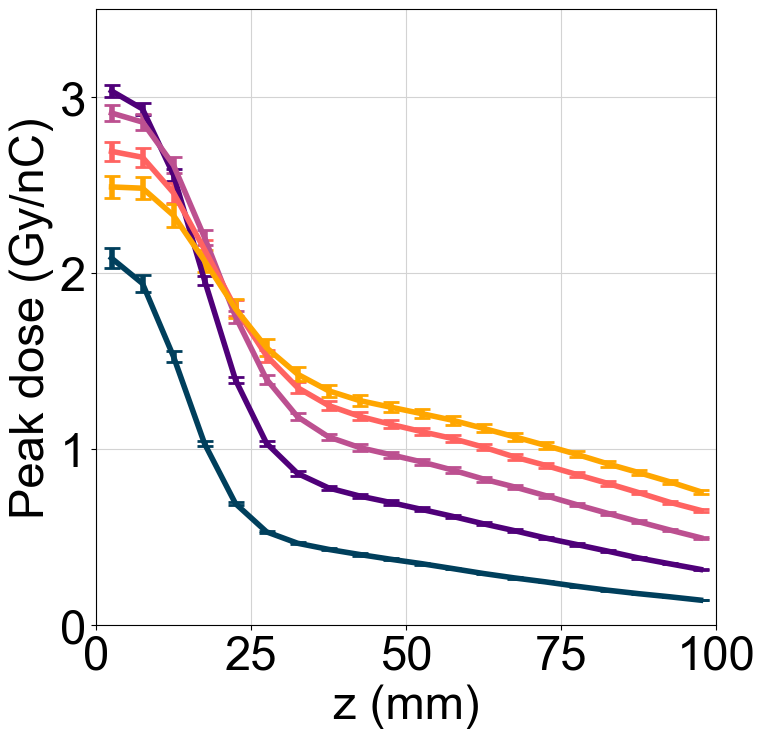

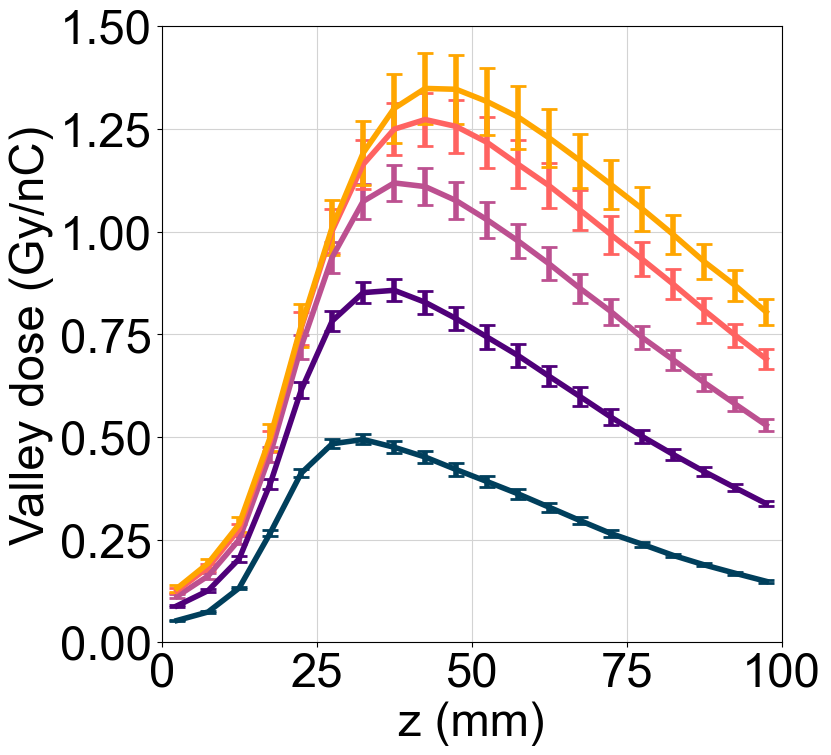

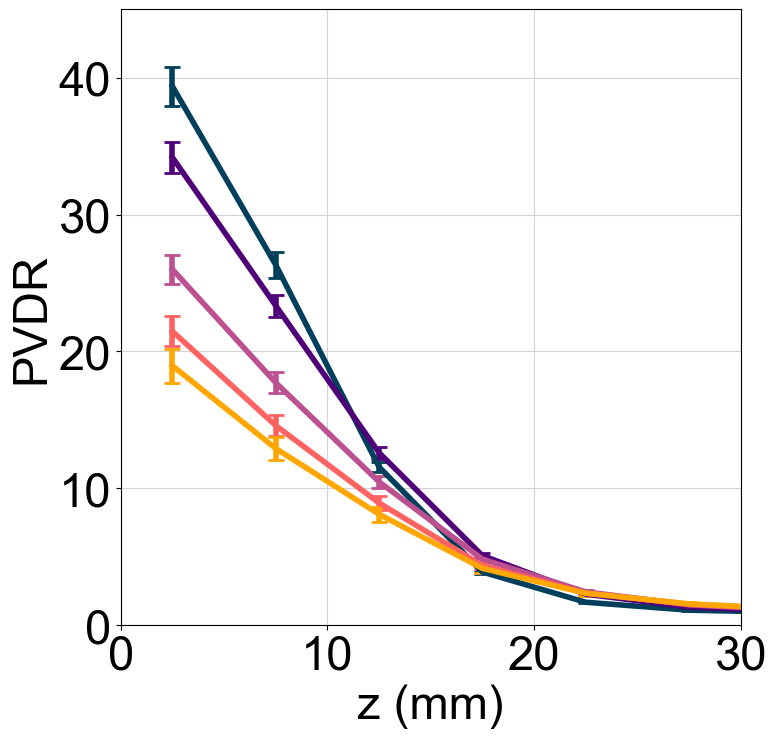

In [27]:
depths=np.arange(0.25,10,0.5)*10
#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses03)):
    if d==0:
        col_avgs=sum(doses03[d][50:150])
        row_avgs=sum(doses03[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0]
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses03[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    peak_error.append(np.std(np.array(peaks).flatten())/np.sqrt(len(np.array(peaks).flatten())))
#     figure(8+d,figsize=(9,8))
#     plt.imshow(doses03[d],cmap='magma')
#     plt.xlim(75,125)
#     plt.ylim(75,125)
#     plt.xlabel('x (pixels)')
#     plt.ylabel('y (pixels)')
#     plt.colorbar(shrink=0.75,label='Dose per charge (Gy/nC)')
#     for i,j in np.reshape(ROI,(225,2)):
#         plt.scatter(j,i,marker='s',c='white',alpha=0.8)
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses03)):
    if d==0:
        col_avgs=sum(doses03[d][50:175])
        row_avgs=sum(doses03[d].T[50:175])
    
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=6+d/1.5)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=6+d/1.5)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses03[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses03[d][i][peak_rows[0]:peak_rows[-1]]))
        
#     figure(8+d,figsize=(9,8))
#     plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='cyan',alpha=0.8,lw=4)
#     plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='cyan',alpha=0.8,lw=4)

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    valley_error.append(np.std(np.array([hori_valleys,vert_valleys]).flatten())/np.sqrt(len(np.array([hori_valleys,vert_valleys]).flatten())))
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr


mean_peaks3=[mean_peaks,peak_error]
mean_valleys3=[mean_valleys,valley_error]
pvdr3=[pvdr,pvdr_error]


#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses05)):
    if d==0:
        col_avgs=sum(doses05[d][50:150])
        row_avgs=sum(doses05[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0]
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses05[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    peak_error.append(np.std(np.array(peaks).flatten())/np.sqrt(len(np.array(peaks).flatten())))
#     figure(8+d,figsize=(9,8))
#     plt.imshow(doses05[d],cmap='magma')
#     plt.xlim(75,125)
#     plt.ylim(75,125)
#     plt.xlabel('x (pixels)')
#     plt.ylabel('y (pixels)')
#     plt.colorbar(shrink=0.75,label='Dose per charge (Gy/nC)')
#     for i,j in np.reshape(ROI,(225,2)):
#         plt.scatter(j,i,marker='s',c='white',alpha=0.8)
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses05)):
    if d==0:
        col_avgs=sum(doses05[d][50:175])
        row_avgs=sum(doses05[d].T[50:175])
    
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=6+d/1.5)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=6+d/1.5)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses05[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses05[d][i][peak_rows[0]:peak_rows[-1]]))
        
#     figure(8+d,figsize=(9,8))
#     plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='cyan',alpha=0.8,lw=4)
#     plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='cyan',alpha=0.8,lw=4)

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    valley_error.append(np.std(np.array([hori_valleys,vert_valleys]).flatten())/np.sqrt(len(np.array([hori_valleys,vert_valleys]).flatten())))
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr


mean_peaks5=[mean_peaks,peak_error]
mean_valleys5=[mean_valleys,valley_error]
pvdr5=[pvdr,pvdr_error]



#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses07)):
    if d==0:
        col_avgs=sum(doses07[d][50:150])
        row_avgs=sum(doses07[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0]
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses07[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    peak_error.append(np.std(np.array(peaks).flatten())/np.sqrt(len(np.array(peaks).flatten())))
#     figure(8+d,figsize=(9,8))
#     plt.imshow(doses07[d],cmap='magma')
#     plt.xlim(75,125)
#     plt.ylim(75,125)
#     plt.xlabel('x (pixels)')
#     plt.ylabel('y (pixels)')
#     plt.colorbar(shrink=0.75,label='Dose per charge (Gy/nC)')
#     for i,j in np.reshape(ROI,(225,2)):
#         plt.scatter(j,i,marker='s',c='white',alpha=0.8)
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses07)):
    if d==0:
        col_avgs=sum(doses07[d][50:175])
        row_avgs=sum(doses07[d].T[50:175])
    
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=6+d/1.5)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=6+d/1.5)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses07[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses07[d][i][peak_rows[0]:peak_rows[-1]]))
        
#     figure(8+d,figsize=(9,8))
#     plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='cyan',alpha=0.8,lw=4)
#     plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='cyan',alpha=0.8,lw=4)

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    valley_error.append(np.std(np.array([hori_valleys,vert_valleys]).flatten())/np.sqrt(len(np.array([hori_valleys,vert_valleys]).flatten())))
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr


mean_peaks7=[mean_peaks,peak_error]
mean_valleys7=[mean_valleys,valley_error]
pvdr7=[pvdr,pvdr_error]



#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses09)):
    if d==0:
        col_avgs=sum(doses09[d][50:150])
        row_avgs=sum(doses09[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0]
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses09[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    peak_error.append(np.std(np.array(peaks).flatten())/np.sqrt(len(np.array(peaks).flatten())))
#     figure(8+d,figsize=(9,8))
#     plt.imshow(doses09[d],cmap='magma')
#     #plt.xlim(75,125)
#     #plt.ylim(75,125)
#     plt.xlabel('x (pixels)')
#     plt.ylabel('y (pixels)')
#     plt.colorbar(shrink=0.75,label='Dose per charge (Gy/nC)')
#     for i,j in np.reshape(ROI,(225,2)):
#         plt.scatter(j,i,marker='s',c='white',alpha=0.8)
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses09)):
    if d==0:
        col_avgs=sum(doses09[d][50:175])
        row_avgs=sum(doses09[d].T[50:175])
    
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=10+d/1.5)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=10+d/1.5)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses09[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses09[d][i][peak_rows[0]:peak_rows[-1]]))
        
#     figure(8+d,figsize=(9,8))
#     plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='cyan',alpha=0.8,lw=4)
#     plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='cyan',alpha=0.8,lw=4)

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    valley_error.append(np.std(np.array([hori_valleys,vert_valleys]).flatten())/np.sqrt(len(np.array([hori_valleys,vert_valleys]).flatten())))
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr


mean_peaks9=[mean_peaks,peak_error]
mean_valleys9=[mean_valleys,valley_error]
pvdr9=[pvdr,pvdr_error]


#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses11)):
    if d==0:
        col_avgs=sum(doses11[d][50:150])
        row_avgs=sum(doses11[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0]
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses11[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    peak_error.append(np.std(np.array(peaks).flatten())/np.sqrt(len(np.array(peaks).flatten())))
#     figure(8+d,figsize=(9,8))
#     plt.imshow(doses11[d],cmap='magma')
#     plt.xlim(75,125)
#     plt.ylim(75,125)
#     plt.xlabel('x (pixels)')
#     plt.ylabel('y (pixels)')
#     plt.colorbar(shrink=0.75,label='Dose per charge (Gy/nC)')
#     for i,j in np.reshape(ROI,(225,2)):
#         plt.scatter(j,i,marker='s',c='white',alpha=0.8)
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses11)):
    if d==0:
        col_avgs=sum(doses11[d][50:175])
        row_avgs=sum(doses11[d].T[50:175])
    
        peak_rows=find_peaks(row_avgs,distance=6+d/1.5)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=6+d/1.5)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=6+d/1.5)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=6+d/1.5)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses11[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses11[d][i][peak_rows[0]:peak_rows[-1]]))
        
#     figure(8+d,figsize=(9,8))
#     plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='cyan',alpha=0.8,lw=4)
#     plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='cyan',alpha=0.8,lw=4)

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    valley_error.append(np.std(np.array([hori_valleys,vert_valleys]).flatten())/np.sqrt(len(np.array([hori_valleys,vert_valleys]).flatten())))
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr


mean_peaks11=[mean_peaks,peak_error]
mean_valleys11=[mean_valleys,valley_error]
pvdr11=[pvdr,pvdr_error]

figure(1,figsize=(8,8))
plt.errorbar(depths,mean_peaks3[0],yerr=mean_peaks3[1],capsize=6,capthick=2,label='0.3 mm',lw=4)
plt.errorbar(depths,mean_peaks5[0],yerr=mean_peaks5[1],capsize=6,capthick=2,label='0.5 mm',lw=4)
plt.errorbar(depths,mean_peaks7[0],yerr=mean_peaks7[1],capsize=6,capthick=2,label='0.7 mm',lw=4)
plt.errorbar(depths,mean_peaks9[0],yerr=mean_peaks9[1],capsize=6,capthick=2,label='0.9 mm',lw=4)
plt.errorbar(depths,mean_peaks11[0],yerr=mean_peaks11[1],capsize=6,capthick=2,label='1.1 mm',lw=4)
plt.ylabel('Peak dose (Gy/nC)')
plt.xlabel('z (mm)')
plt.grid(c='lightgray')
plt.ylim(0,3.5)
plt.xlim(0,100)
#plt.legend()


figure(2,figsize=(8,8))
plt.errorbar(depths,mean_valleys3[0],yerr=mean_valleys3[1],capsize=6,capthick=2,label='0.3 mm',lw=4)
plt.errorbar(depths,mean_valleys5[0],yerr=mean_valleys5[1],capsize=6,capthick=2,label='0.5 mm',lw=4)
plt.errorbar(depths,mean_valleys7[0],yerr=mean_valleys7[1],capsize=6,capthick=2,label='0.7 mm',lw=4)
plt.errorbar(depths,mean_valleys9[0],yerr=mean_valleys9[1],capsize=6,capthick=2,label='0.9 mm',lw=4)
plt.errorbar(depths,mean_valleys11[0],yerr=mean_valleys11[1],capsize=6,capthick=2,label='1.1 mm',lw=4)
plt.ylabel('Valley dose (Gy/nC)')
plt.xlabel('z (mm)')
plt.grid(c='lightgray')
plt.ylim(0,1.5)
plt.xlim(0,100)
#plt.legend(title='Hole width')

print(pvdr11[0],pvdr11[1])

figure(3,figsize=(8,8))
plt.errorbar(depths,pvdr3[0],yerr=pvdr3[1],capsize=6,capthick=2,label='0.3 mm',lw=4)
plt.errorbar(depths,pvdr5[0],yerr=pvdr5[1],capsize=6,capthick=2,label='0.5 mm',lw=4)
plt.errorbar(depths,pvdr7[0],yerr=pvdr7[1],capsize=6,capthick=2,label='0.7 mm',lw=4)
plt.errorbar(depths,pvdr9[0],yerr=pvdr9[1],capsize=6,capthick=2,label='0.9 mm',lw=4)
plt.errorbar(depths,pvdr11[0],yerr=pvdr11[1],capsize=6,capthick=2,label='1.1 mm',lw=4)
plt.ylabel('PVDR')
plt.xlabel('z (mm)')
plt.grid(c='lightgray')
plt.ylim(0,45)
plt.xlim(0,30)
#plt.legend(title='Hole width')

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 34}

matplotlib.rc('font', **font)

# l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
# mode="expand", borderaxespad=0, ncol=5,title='Hole width')
print(np.around(np.interp(1/1.1,1/pvdr3[0],depths*10),1),np.around(np.interp(1/1.1,1/pvdr5[0],depths*10),1),np.around(np.interp(1/1.1,1/pvdr7[0],depths*10),1),np.around(np.interp(1/1.1,1/pvdr9[0],depths*10),1),np.around(np.interp(1/1.1,1/pvdr11[0],depths*10),1))

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#003f5c','#4f0079','#bc5090','#ff6361','#ffa600']) 

print(pvdr9[0][0],pvdr9[1][0])

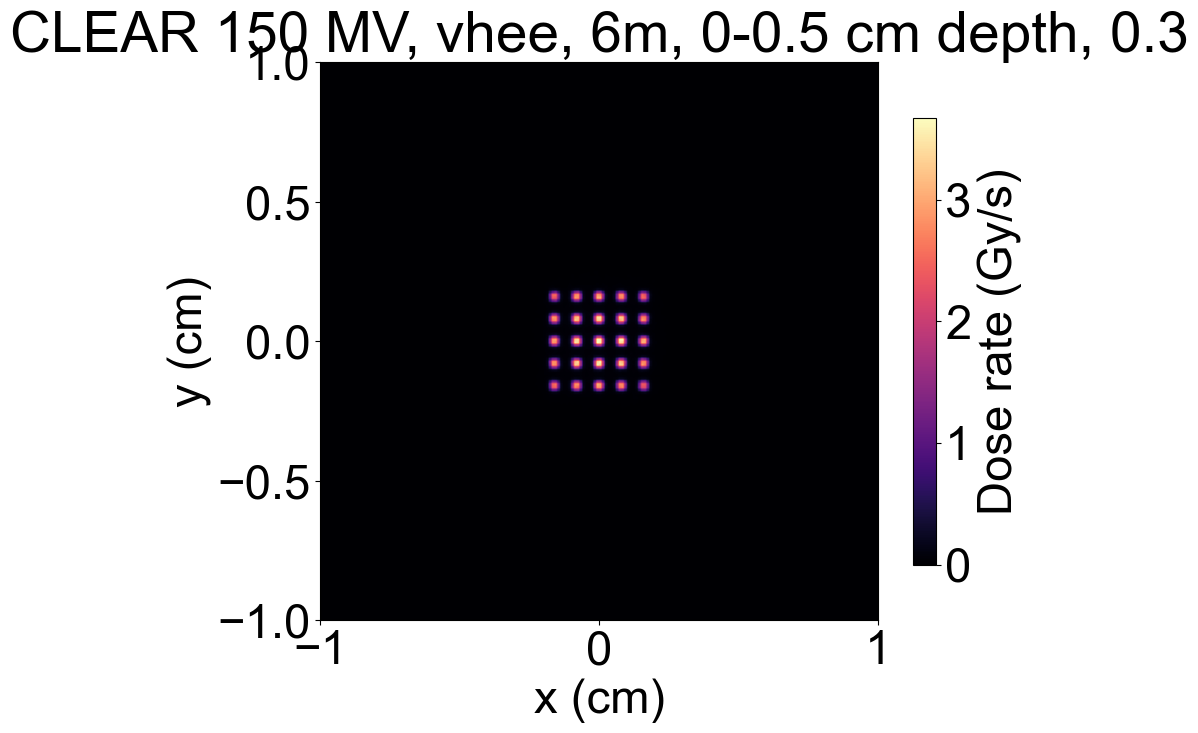

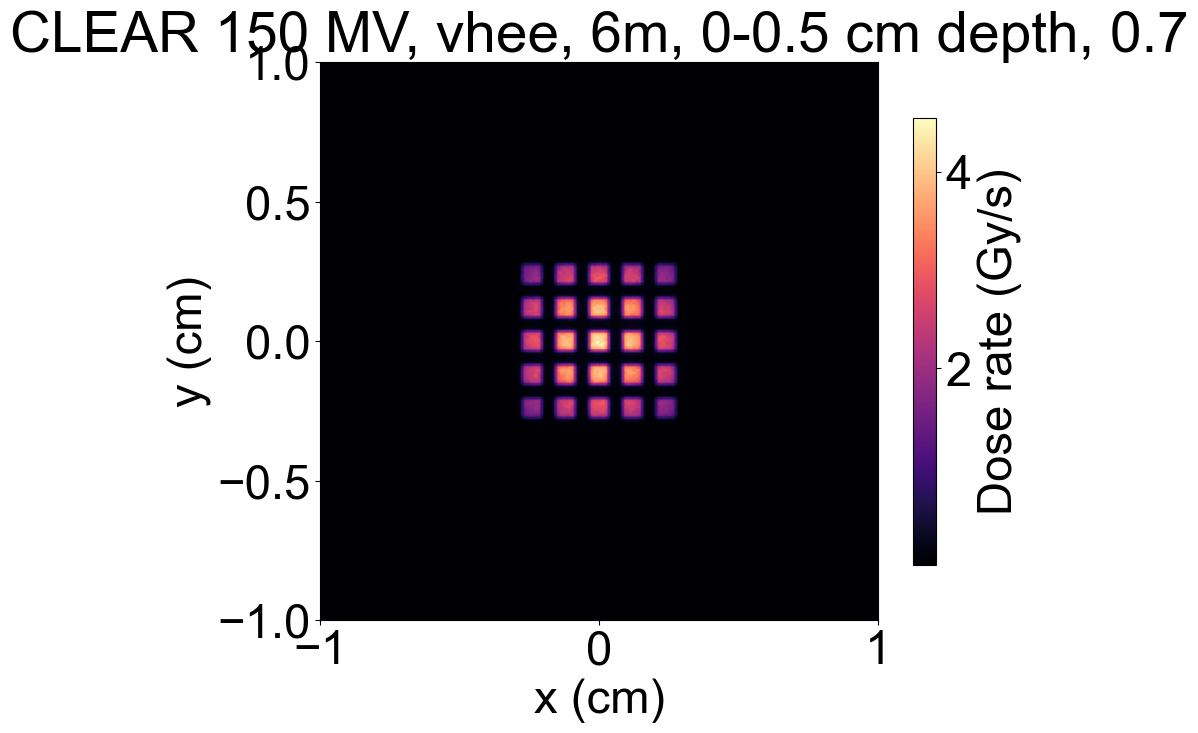

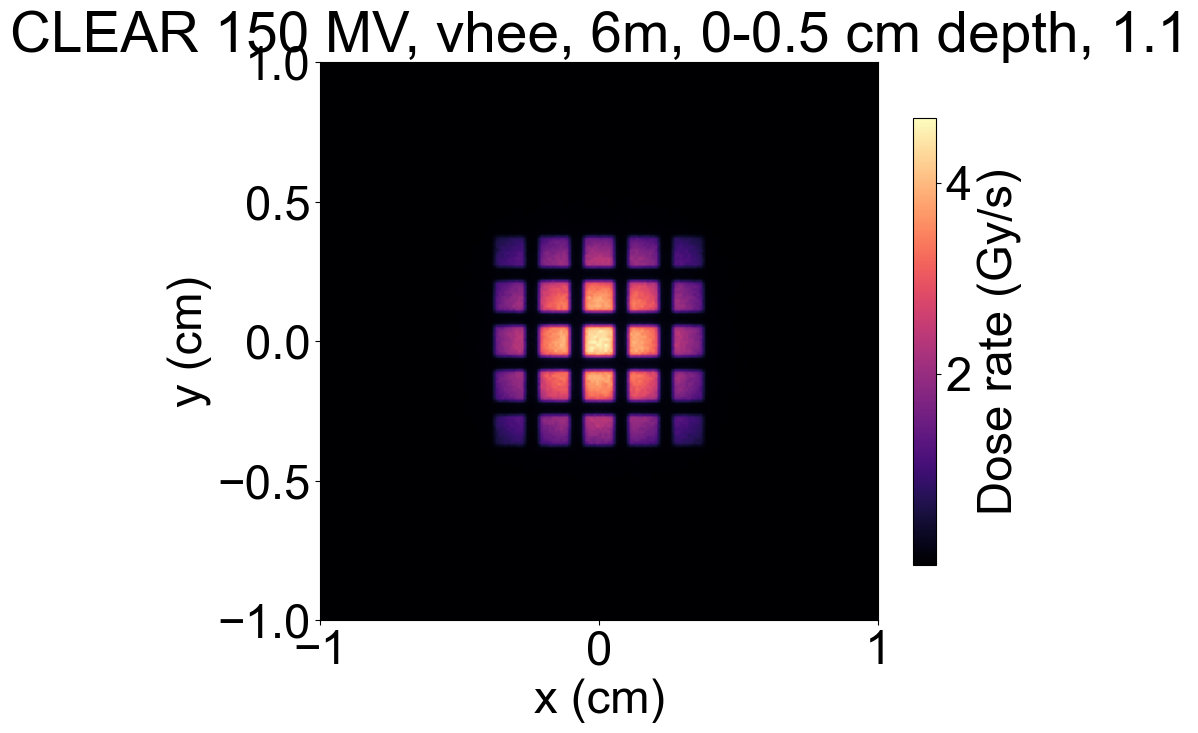

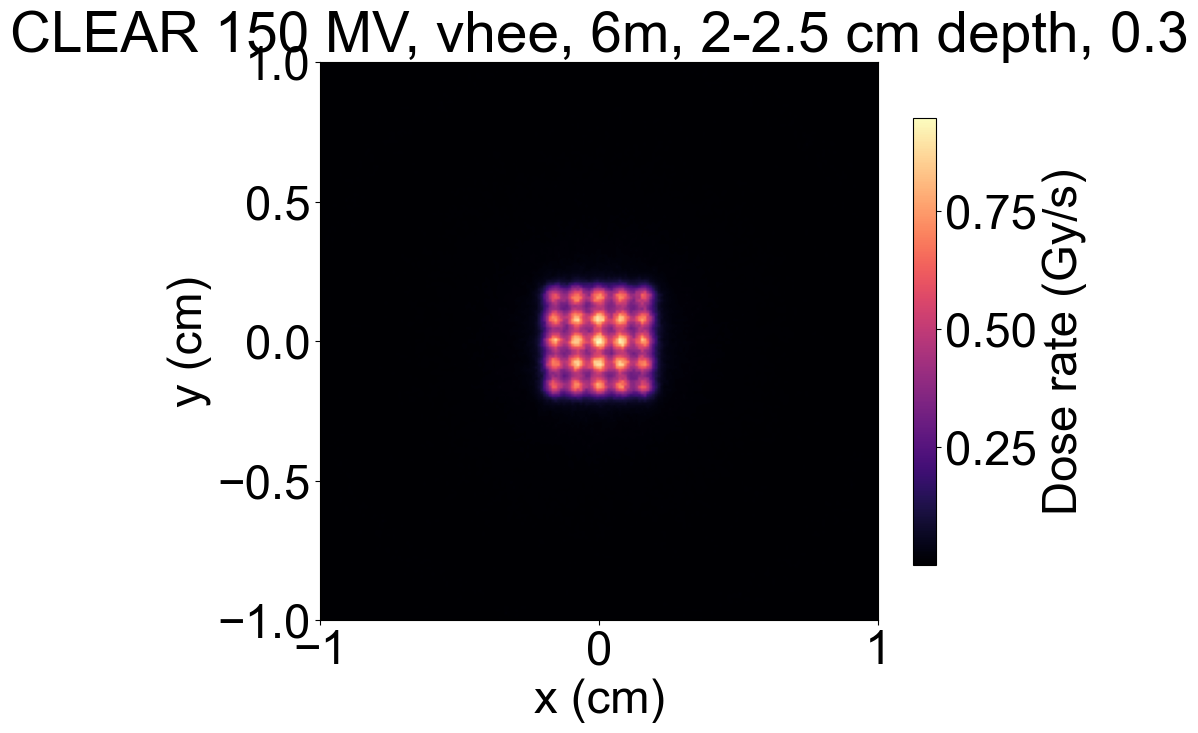

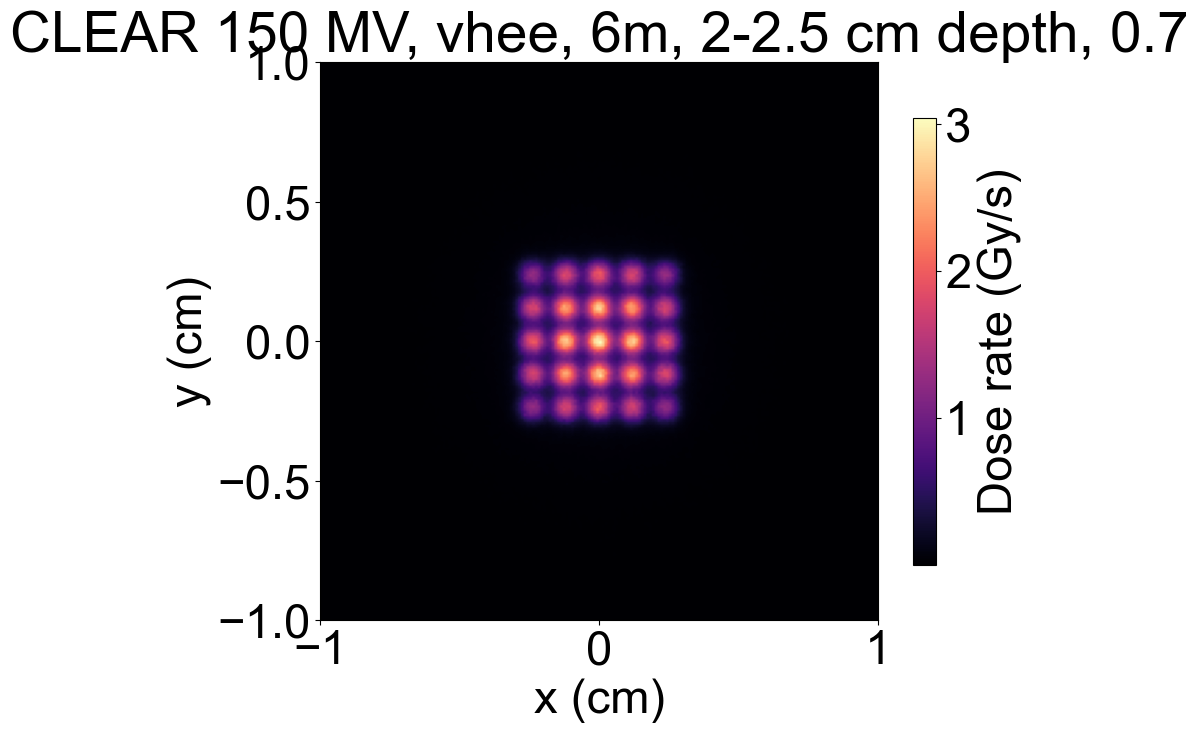

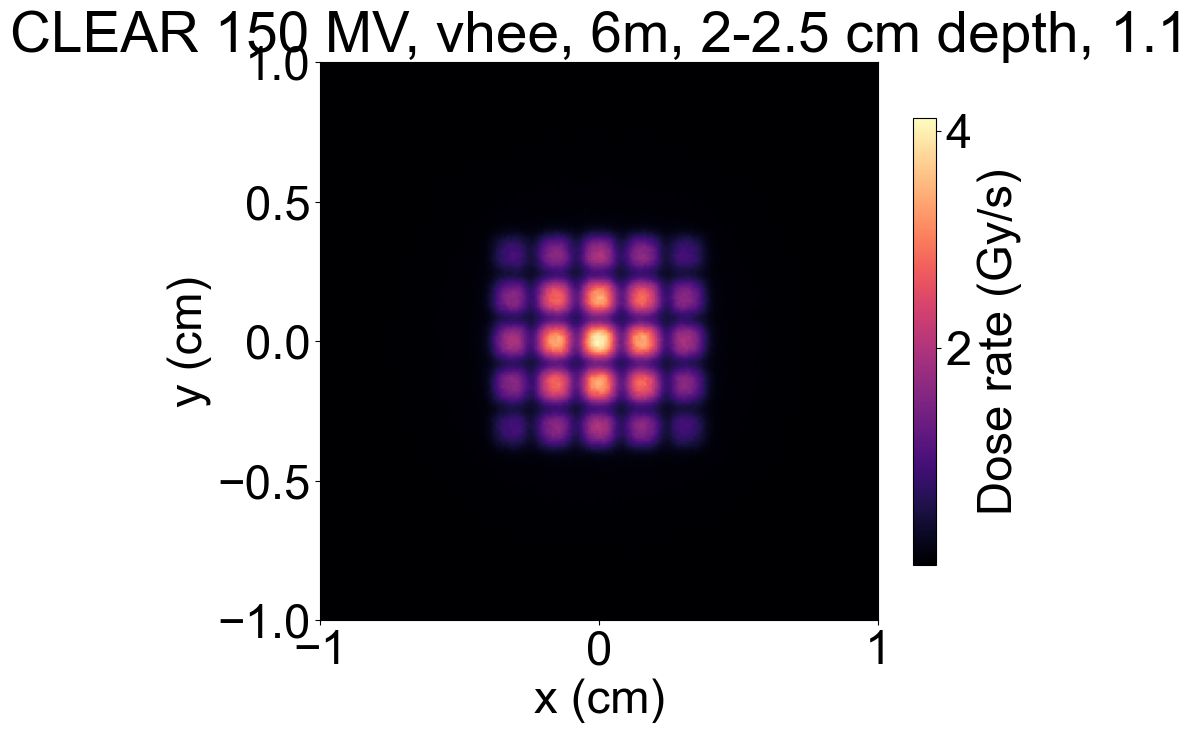

In [6]:
figure(4,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth, 0.3')
plt.imshow(dose03_1,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(5,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth, 0.7')
plt.imshow(dose07_1,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(6,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth, 1.1')
plt.imshow(dose11_1,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(7,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth, 0.3')
plt.imshow(dose03_5,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(8,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth, 0.7')
plt.imshow(dose07_5,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(9,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth, 1.1')
plt.imshow(dose11_5,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

(-0.11048297272764356, 2.5)

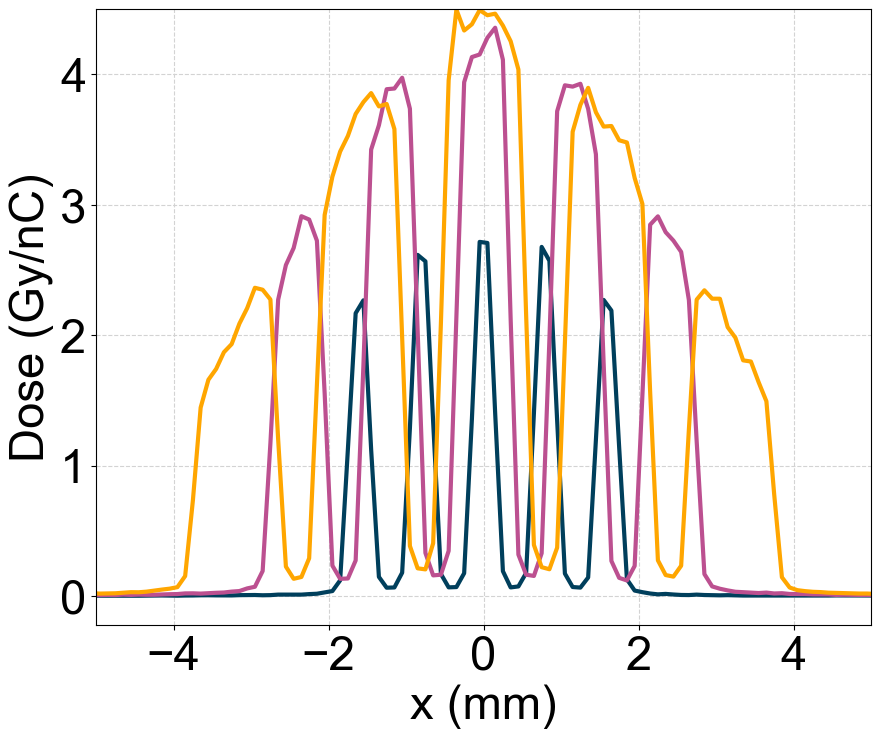

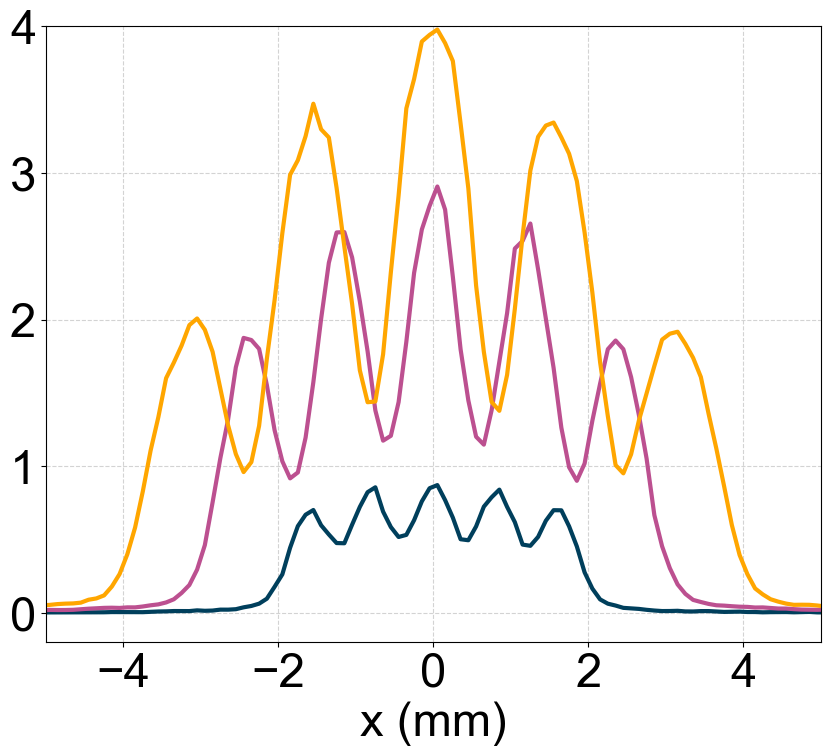

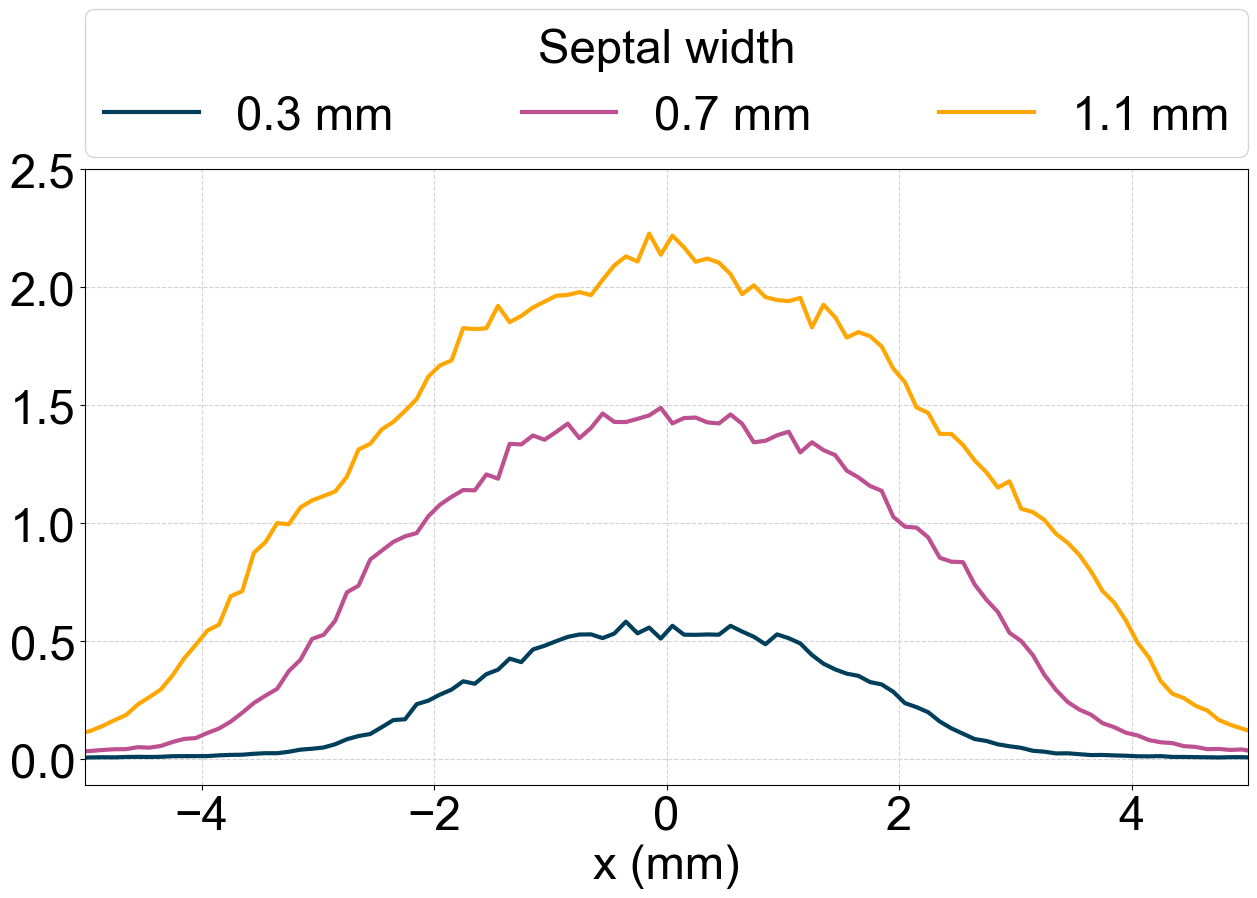

In [23]:
profile03_1=(dose03_1.T[100]+dose03_1.T[101])/2
profile05_1=(dose05_1.T[100]+dose05_1.T[101])/2
profile07_1=(dose07_1.T[100]+dose07_1.T[101])/2
profile09_1=(dose09_1.T[100]+dose09_1.T[101])/2
profile11_1=(dose11_1.T[100]+dose11_1.T[101])/2

profile03_2=(dose03_5.T[100]+dose03_5.T[101])/2
profile05_2=(dose05_5.T[100]+dose05_5.T[101])/2
profile07_2=(dose07_5.T[100]+dose07_5.T[101])/2
profile09_2=(dose09_5.T[100]+dose09_5.T[101])/2
profile11_2=(dose11_5.T[100]+dose11_5.T[101])/2

profile03_3=(dose03_9.T[100]+dose03_9.T[101])/2
profile05_3=(dose05_9.T[100]+dose05_9.T[101])/2
profile07_3=(dose07_9.T[100]+dose07_9.T[101])/2
profile09_3=(dose09_9.T[100]+dose09_9.T[101])/2
profile11_3=(dose11_9.T[100]+dose11_9.T[101])/2
x=np.arange(-.995,.995+0.01,0.01)*10
%matplotlib inline
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 34}

matplotlib.rc('font', **font)

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#003f5c','#bc5090','#ffa600']) 

figure(1,figsize=(10,8))
#plt.title('0-5 mm depth in water')
#plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,profile03_1,label='0.3 cm',lw=3)
#plt.plot(x,profile05_1,label='5 cm',lw=3,ls='--')
plt.plot(x,profile07_1,label='7 cm',lw=3)
#plt.plot(x,profile09_1,label='9 cm',lw=3,ls='--')
plt.plot(x,profile11_1,label='11 cm',lw=3)
#plt.legend(title='Collimator thickness')
plt.xlabel('x (mm)')
plt.ylabel('Dose (Gy/nC)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-5,5)
plt.ylim(top=4.5)



figure(2,figsize=(10,8))
#plt.title('20-25 mm depth in water')
plt.plot(x,profile03_2,label='3',lw=3)
#plt.plot(x,profile05_2,label='5',lw=3)
plt.plot(x,profile07_2,label='7',lw=3)
#plt.plot(x,profile09_2,label='9',lw=3)
plt.plot(x,profile11_2,label='11',lw=3)
#plt.legend()
plt.xlabel('x (mm)')
#plt.ylabel('Dose (Gy/nC)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-5,5)
plt.ylim(top=4)

figure(3,figsize=(15,8))
#plt.title('40-45 mm depth in water')
#plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 4-4.5 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,profile03_3,label='0.3 mm',lw=3)
#plt.plot(x,profile05_3,label='50 mm',lw=3)
plt.plot(x,profile07_3,label='0.7 mm',lw=3)
#plt.plot(x,profile09_3,label='90 mm',lw=3)
plt.plot(x,profile11_3,label='1.1 mm',lw=3)
#plt.legend()
plt.xlabel('x (mm)')
#plt.ylabel('Dose (Gy/nC)')
plt.grid(c='lightgray',ls='--')
plt.xlim(-5,5)
l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
mode="expand", borderaxespad=0, ncol=5,title='Septal width')
plt.ylim(top=2.5)